*First compiled: September 14, 2017.*

# Exports for comparisons with other algorithms

In [14]:
import numpy as np
import pandas as pd
import scanpy.api as sc
sc.settings.verbosity = 1                          # verbosity = 3: errors, warnings, info, hints
sc.settings.set_figure_params(dpi=80)              # low dots per inch yields small inline figures
sc.logging.print_version_and_date()

Running Scanpy version 0.2.8+14.gdc3fb50.dirty on 2017-09-15 11:46.


The data is the same as in the [figure_1_sim](../sim_data/figure_1_sim.ipynb) example, where you can find more information.

## Export data with a continuous tree and clusters

In [2]:
adata_krumsiek11 = sc.examples.krumsiek11()
X_blobs = sc.examples.blobs(n_centers=2, cluster_std=0.5).X
X_concatenated = np.r_[adata_krumsiek11.X, X_blobs]
adata = sc.AnnData(X_concatenated)
adata.var_names = adata_krumsiek11.var_names
sc.tl.draw_graph(adata)
sc.write('krumsiek11_blobs', adata)

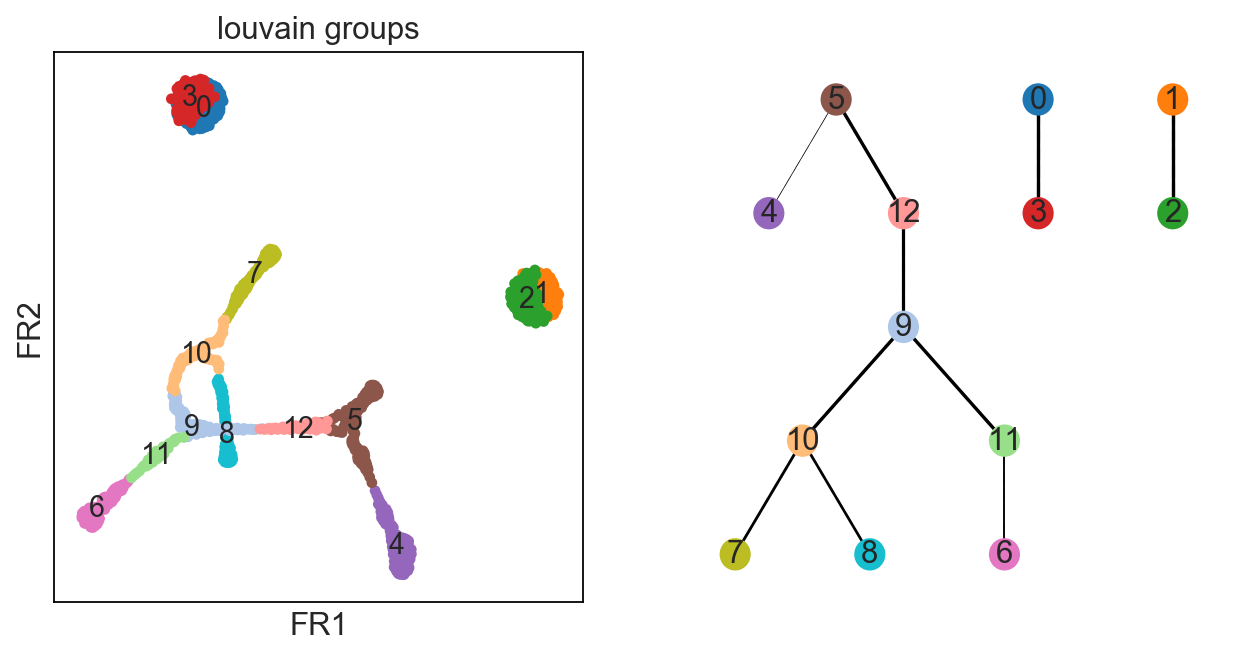

In [3]:
adata = sc.read('krumsiek11_blobs')
sc.tl.aga(adata, resolution=2.5)
ax = sc.pl.aga(adata, basis='draw_graph_fr', layout='rt', root=['5', '0', '1'])

Actually do the exports.

In [4]:
# For Monocle 2, simply export the whole AnnData object.
sc.write('./comparisons/data/krumsiek11_blobs.csv', adata)
# For Eclair, we need it in tab-separated format.
df = pd.DataFrame(adata.X)
df.to_csv('./comparisons/eclair/X_krumsiek11_blobs.txt', sep='\t')
# For StemID, we need to shift it to remove negative values.
X_shifted = adata.X - np.min(adata.X)
df = pd.DataFrame(X_shifted)
df.to_csv('./comparisons/stemID/X_krumsiek11_blobs_shifted.csv')

Just a brief check that the shifted matrix yields the same results.

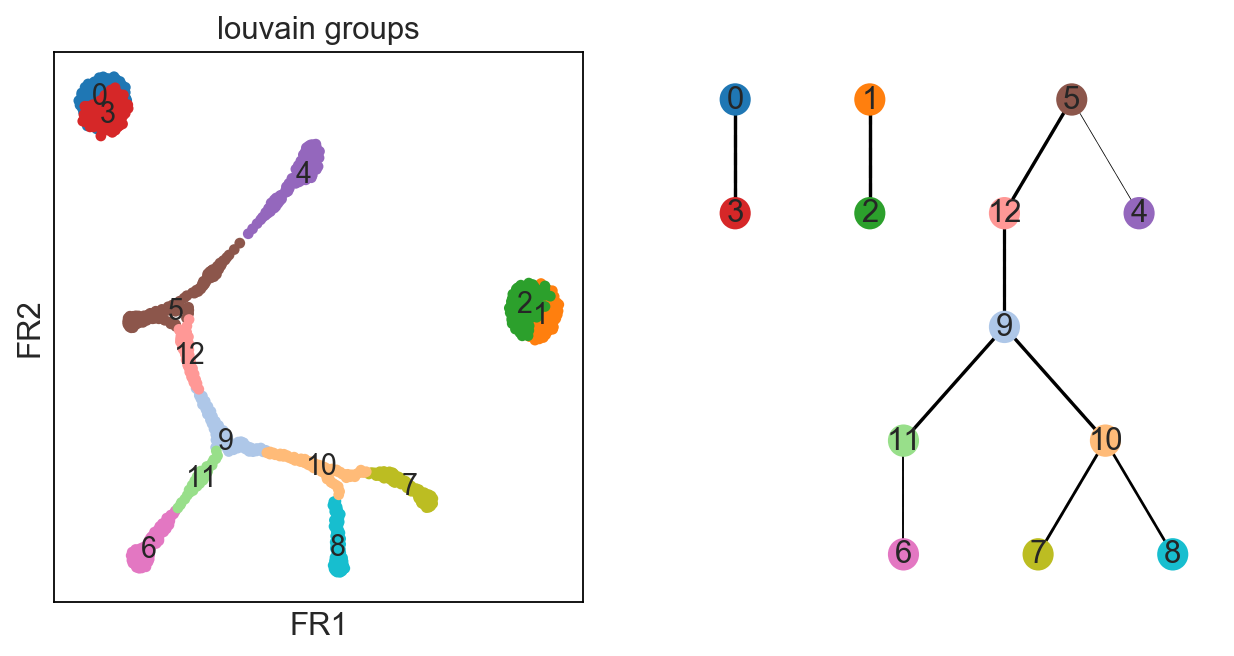

In [5]:
adata = sc.AnnData(X_shifted)
adata.var_names = adata_krumsiek11.var_names
sc.tl.draw_graph(adata)
sc.tl.aga(adata, resolution=2.5)
ax = sc.pl.aga(adata, basis='draw_graph_fr', layout='rt', root=['5', '0', '1'])

## Export a simple tree

In [17]:
adata = sc.examples.krumsiek11()
# For Eclair, we need it in tab-separeted format.
pd.DataFrame(adata.X).to_csv('./comparisons/eclair/X_krumsiek11.txt', sep='\t')
sc.pp.scale(adata)
pd.DataFrame(adata.X).to_csv('./comparisons/eclair/X_krumsiek11_scaled.txt', sep='\t')
# For StemID, we need to shift it to remove negative values.
X_shifted = adata.X - np.min(adata.X)
df = pd.DataFrame(X_shifted)
df.to_csv('./comparisons/stemID/X_krumsiek11_shifted.csv')

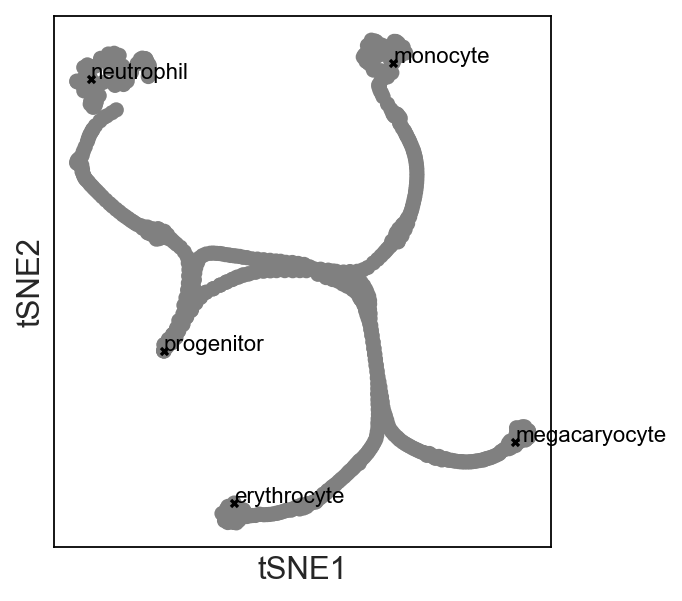

In [18]:
sc.tl.tsne(adata)
ax = sc.pl.tsne(adata)

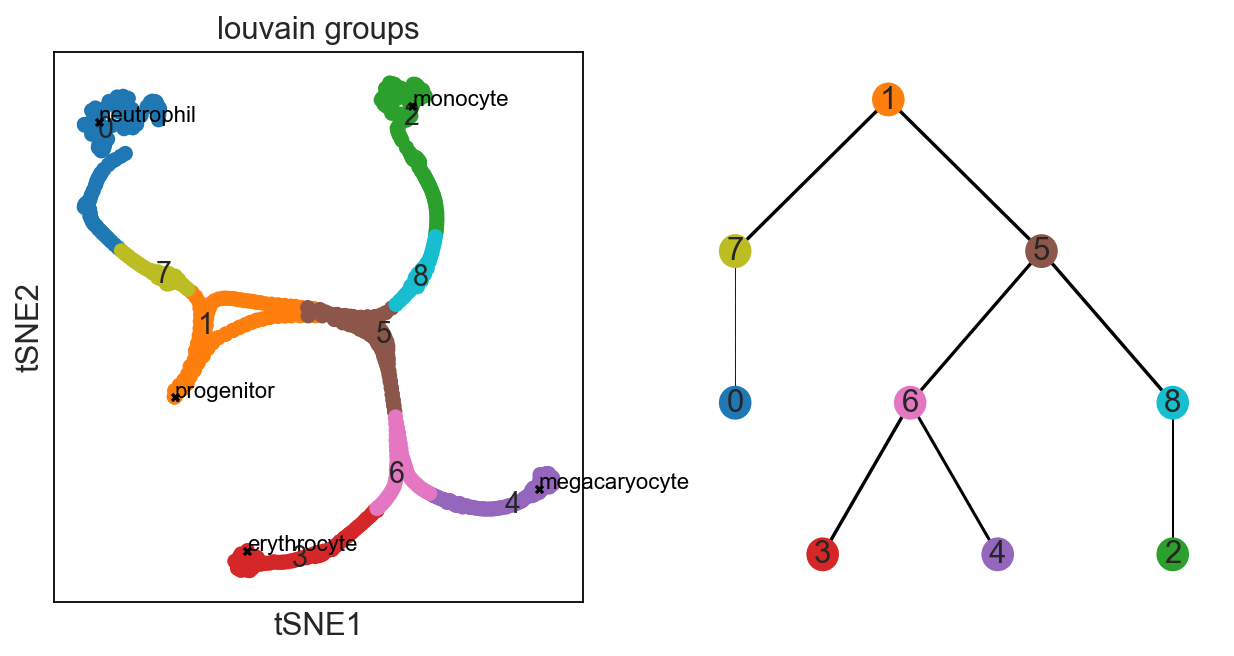

In [19]:
sc.tl.aga(adata)
ax = sc.pl.aga(adata, layout='rt', root='1', save='_simple_tree', show=True)

In [20]:
sc.write('./comparisons/data/krumsiek11.csv', adata)